# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load the Data (training & test sets)

In [1]:
import pickle

#pickled file names
training_file = 'train.p'
testing_file = 'test.p'

#import pickled data files
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = (X_train[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

An image from each class (and its label above) is shown below:


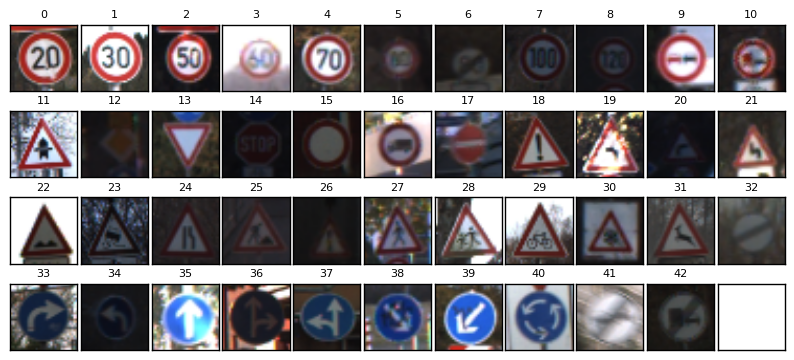

Number of class instances by class:
Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})

Majority class: 2
Majority class count: 2250


In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from collections import Counter
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

#show an image from each class in the supplied data set
def show_one_image_per_class(rows, cols, figsize, X, y):

    #return a list of lists contianing subplot objects handles (should return num_rows, 
    #each row containing num_cols subplot object handles)
    fig, subplot_handle_list = plt.subplots(4, 11, figsize=(10, 4.2), subplot_kw={'xticks': [], 'yticks': []}, \
                                        sharex=True, sharey=True)
    #adjust spacing
    fig.subplots_adjust(hspace=0.3, wspace=0.05)

    #flatten the subplot_handle_list so it can be indexed
    flat_subplot_handle_list = subplot_handle_list.flat
    subplot_index = 0

    #get the distinct set of classes in y
    distinct_y_classes = set(y)

    #enumerate the distinct set of classes in y and show one image (in X) from each class
    for cur_class in distinct_y_classes:
        #determine the indexes where cur_class exists within the y
        cur_class_instance_indexes = [index for index, value in enumerate(y) if value == cur_class]
        #determine list length
        num_cur_class_instance_indexes = len(cur_class_instance_indexes)
        #randomly select an index within the list of instances of cur_class
        random_index = random.randint(0, (num_cur_class_instance_indexes - 1))
        #select the randomly chosen index from the list of cur_class instance indexes
        random_cur_class_instance_index = cur_class_instance_indexes[random_index]
        #assign the values to the current subplot
        flat_subplot_handle_list[subplot_index].imshow(X[random_cur_class_instance_index])
        flat_subplot_handle_list[subplot_index].set_title(y[random_cur_class_instance_index], fontsize=8)
        subplot_index = subplot_index + 1
    
    print("An image from each class (and its label above) is shown below:")
    
    #show the plot
    plt.show()

#show one image for each class in the data set
show_one_image_per_class(4, 11, (10, 4.2), X_train, y_train)

#get a dictionary with the tally for each class in the data set (in descending order)
num_class_instances_by_class = Counter(y_train)
print("Number of class instances by class:")
print(num_class_instances_by_class)
print()
#extract majority class
majority_class = (num_class_instances_by_class.most_common(1))[0][0]
print("Majority class:", majority_class)
#extract the majority class count
num_majority_class_instances = (num_class_instances_by_class.most_common(1))[0][1]
print("Majority class count:", num_majority_class_instances)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Carve out a validation set from training set

In [4]:
from sklearn.model_selection import train_test_split

#carve out a portion of the training set to use for model validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, \
                                                                random_state=0, stratify=y_train)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_validation shape: ", X_validation.shape)
print("y_validation shape: ", y_validation.shape)

X_train shape:  (31367, 32, 32, 3)
y_train shape:  (31367,)
X_validation shape:  (7842, 32, 32, 3)
y_validation shape:  (7842,)


### ** Create synthetic data from training set (execute only if creating new synthetic data - load existing below)

In [5]:
import cv2
import random
import numpy as np
from numpy import newaxis
from collections import Counter

#rotate training example
def generate_rotation_matrix(training_example):
    #determine center point of source (training_example) --- used for center of rotation
    object_center_point = ((training_example.shape[0] / 2), (training_example.shape[1] / 2))
    #randomly select a scale within a uniform distribution (shrink/expand example)
    object_scale = np.random.uniform(low=0.5, high=1.1)
    #randomly select an angle within a uniform distribution (rotation-factor, negative is clock-wise)
    object_rotation_angle = np.random.uniform(low=-5, high=5)
    #return rotation matrix based on above values
    return cv2.getRotationMatrix2D(object_center_point, object_rotation_angle, object_scale)
    
#translate (change position of) training example
#translation matrix found here: http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html
def generate_translation_matrix(training_example):
    #randomly translate x
    translated_x = np.random.uniform(low=-2, high=2)
    #randomly translate y
    translated_y = np.random.uniform(low=-2, high=2)
    #return translation matrix based on above values
    return np.float32([[1, 0, translated_x],[0, 1, translated_y]])

#shear (change angle of view or perspective) of training example
#info found here: https://en.wikipedia.org/wiki/Affine_transformation / https://en.wikipedia.org/wiki/Shear_mapping
def generate_shearing_matrix(training_example):
    #source triangle points (statically mapped on a 32x32x1 plane)
    source_triangle = np.float32([[5, 5], [20, 5], [5, 20]])
    #shear triangle points (map source points to shear points)
    sheared_triangle = np.float32([(source_triangle[0] + np.random.uniform(low=-2, high=2)), \
                                   (source_triangle[1] + np.random.uniform(low=-2, high=2)), \
                                   (source_triangle[2] + np.random.uniform(low=-2, high=2))])
    #return shearing matrix based on above values
    return cv2.getAffineTransform(source_triangle, sheared_triangle)
    
#perform brightness adjustment
def perform_brightness_adjustment(training_example):
    #convert RGB to HSV
    hsv = cv2.cvtColor(training_example, cv2.COLOR_RGB2HSV)
    #randomly adjust V channel
    hsv[:,:,2] = hsv[:,:,2] + np.random.uniform(low=0.02, high=0.08)
    #convert back to RGB and return
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

#randomly rotate object (within specified matrix bounds)
def perform_rotation(training_example):
    object_transform_matrix = generate_rotation_matrix(training_example)
    return cv2.warpAffine(training_example, object_transform_matrix, (training_example.shape[0], training_example.shape[1]))
    
#randomly translate object (within specified matrix bounds)
def perform_translation(training_example):
    object_transform_matrix = generate_translation_matrix(training_example)
    return cv2.warpAffine(training_example, object_transform_matrix, (training_example.shape[0], training_example.shape[1]))

#randomly shear object (within specified matrix bounds)
def perform_shearing(training_example):
    object_transform_matrix = generate_shearing_matrix(training_example)
    return cv2.warpAffine(training_example, object_transform_matrix, (training_example.shape[0], training_example.shape[1]))
    
#generate a synthetic example (with 1 to 3 random transformations) from the supplied training example in the same class
def generate_synthetic_training_example(training_example):
    #list of transformation functions available
    transformation_functions = [perform_rotation, perform_translation, perform_shearing, perform_brightness_adjustment]
    #return image transformed using randomly selected transformation function
    return random.choice(transformation_functions)(training_example)
    
#generate synthetic examples for a particular class
def generate_cur_class_synthetic_training_examples(cur_class, X_train, y_train, num_synthetic_examples_to_create):
    #determine the indexes where cur_class exists within the training set
    cur_class_instance_indexes = [index for index, value in enumerate(y_train) if value == cur_class]
    #determine list length for later use
    num_cur_class_instance_indexes = len(cur_class_instance_indexes)
    #lists to house the synthetic training examples for the class we're working with
    X_train_synthetic_cur_class = [] 
    y_train_synthetic_cur_class = [] 
    #generate synthetic examples to augment and balance cur_class
    for _ in range(0, num_synthetic_examples_to_create):
        #randomly select an index within the list of instances of cur_class
        random_index = random.randint(0, (num_cur_class_instance_indexes - 1))
        #select the randomly chosen index from the list of cur_class instance indexes
        random_cur_class_instance_index = cur_class_instance_indexes[random_index]
        #create a synthetic version of the example at that index from the training set
        X_train_synthetic_cur_class.append(generate_synthetic_training_example(X_train[random_cur_class_instance_index]))
        y_train_synthetic_cur_class.append(y_train[random_cur_class_instance_index])
    return (X_train_synthetic_cur_class, y_train_synthetic_cur_class)
        
#generate synthetic data to balance and augment the training set
def generate_synthetic_training_examples(X_train, y_train, num_class_instances_target):
    #get the distinct set of classes in y_train
    distinct_y_train_classes = set(y_train)
    #lists to hold synthetic training data & labels
    X_train_synthetic = []
    y_train_synthetic = []
    #enumerate the distinct set of classes in the training set and augment/balance data for each
    for cur_class in distinct_y_train_classes:
        #get the instance count of cur_class from y_train
        num_cur_class_instances = list(y_train).count(cur_class)
        #determine the number of synthetic examples to create to both augment and balance cur_class
        num_synthetic_examples_to_create = num_class_instances_target - num_cur_class_instances
        #generate synthetic examples for cur_class
        X_train_synthetic_cur_class, y_train_synthetic_cur_class = generate_cur_class_synthetic_training_examples(\
                                                                                             cur_class, X_train, y_train, \
                                                                                             num_synthetic_examples_to_create)
        #append synthetic cur_class examples to total synthetic example set
        X_train_synthetic.append(X_train_synthetic_cur_class)
        y_train_synthetic.append(y_train_synthetic_cur_class)
    #concatenate all of the 4d arrays within the X_train_synthetic and 1d arrays within y_train_synthetic lists 
    return (np.concatenate(X_train_synthetic), np.concatenate(y_train_synthetic))
        
#the minimum number of additional examples per class we'd like to add, 
#due to class imbalance more will be added as well to balance all classes
num_augmentation_instances_target = 100
#get a dictionary with the tally for each class in the data set (in descending order)
num_class_instances_by_class = Counter(y_train)
#extract the majority class count
num_majority_class_instances = (num_class_instances_by_class.most_common(1))[0][1]
#set the target class count for each class in the data set
num_class_instances_target = num_majority_class_instances + num_augmentation_instances_target
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
#generate synthetic training examples for each class based on existing examples within each class
X_train_synthetic, y_train_synthetic = generate_synthetic_training_examples(X_train, y_train, num_class_instances_target)
print("X_train_synthetic shape: ", X_train_synthetic.shape)
print("y_train_synthetic shape: ", y_train_synthetic.shape)

X_train shape:  (31367, 32, 32, 3)
y_train shape:  (31367,)
X_train_synthetic shape:  (50333, 32, 32, 3)
y_train_synthetic shape:  (50333,)


### ** Save synthetic data set (execute only if you just created new data above)

In [6]:
import pickle

#pickled file names
training_synthetic_file = 'train_synthetic.p'

train_synthetic_dict = {'features': X_train_synthetic, 'labels': y_train_synthetic}

#pickle syntehtic data
with open(training_synthetic_file, mode='wb') as f:
    pickle.dump(train_synthetic_dict, f)

### ** Load previously created synthetic data set (load only if you haven't just created a new data above)

In [7]:
import pickle

#pickled file names
training_synthetic_file = 'train_synthetic.p'

#import pickled data files
with open(training_synthetic_file, mode='rb') as f:
    train_synthetic = pickle.load(f)
    
X_train_synthetic, y_train_synthetic = train_synthetic['features'], train_synthetic['labels']
print(X_train_synthetic.shape)
print(y_train_synthetic.shape)

(50333, 32, 32, 3)
(50333,)


### Visualize synthetic data set

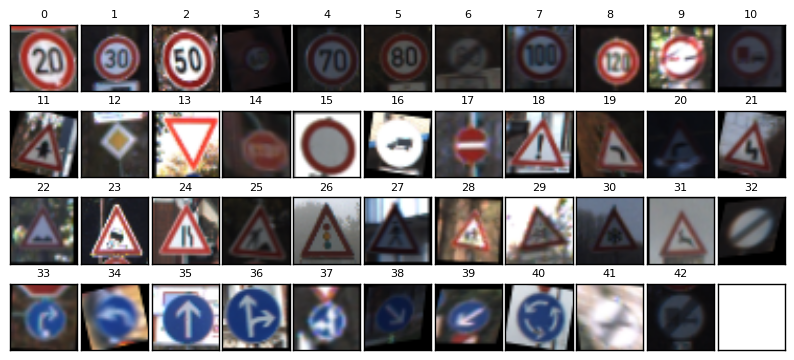

Number of class instances by class:
Counter({0: 1732, 19: 1732, 37: 1732, 27: 1708, 32: 1708, 41: 1708, 42: 1708, 24: 1684, 29: 1684, 39: 1660, 21: 1636, 20: 1612, 40: 1612, 22: 1588, 36: 1588, 6: 1564, 16: 1564, 34: 1564, 30: 1540, 23: 1492, 28: 1468, 26: 1420, 15: 1396, 33: 1349, 14: 1276, 31: 1276, 17: 1012, 18: 940, 35: 940, 11: 844, 3: 772, 8: 772, 7: 748, 9: 724, 25: 700, 5: 412, 4: 316, 10: 292, 38: 244, 12: 220, 13: 172, 1: 124, 2: 100})

Majority class (class at greatest deficit with respect to balance): 0
Majority class count: 1732


In [8]:
from collections import Counter

#show one image for each class in the data set
show_one_image_per_class(4, 11, (10, 4.2), X_train_synthetic, y_train_synthetic)

#get a dictionary with the tally for each class in the data set (in descending order)
num_class_instances_by_class = Counter(y_train_synthetic)
print("Number of class instances by class:")
print(num_class_instances_by_class)
print()
#extract majority class
majority_class = (num_class_instances_by_class.most_common(1))[0][0]
print("Majority class (class at greatest deficit with respect to balance):", majority_class)
#extract the majority class count
num_majority_class_instances = (num_class_instances_by_class.most_common(1))[0][1]
print("Majority class count:", num_majority_class_instances)

### Combine the synthetic training data set with the original training set

In [9]:
import numpy as np
#add additional training examples to existing training data to balance and augment
#converting each to float here as if we wait until after they're combined we'll have memory errors due to the size of the set
X_train = np.append(X_train, X_train_synthetic, axis=0)
y_train = np.append(y_train, y_train_synthetic, axis=0)
print("X_train + X_synthetic shape: ", X_train.shape)
print("y_train + y_synthetic shape: ", y_train.shape)

from collections import Counter
num_class_instances_by_class = Counter(y_train)
print(num_class_instances_by_class)

X_train + X_synthetic shape:  (81700, 32, 32, 3)
y_train + y_synthetic shape:  (81700,)
Counter({0: 1900, 1: 1900, 2: 1900, 3: 1900, 4: 1900, 5: 1900, 6: 1900, 7: 1900, 8: 1900, 9: 1900, 10: 1900, 11: 1900, 12: 1900, 13: 1900, 14: 1900, 15: 1900, 16: 1900, 17: 1900, 18: 1900, 19: 1900, 20: 1900, 21: 1900, 22: 1900, 23: 1900, 24: 1900, 25: 1900, 26: 1900, 27: 1900, 28: 1900, 29: 1900, 30: 1900, 31: 1900, 32: 1900, 33: 1900, 34: 1900, 35: 1900, 36: 1900, 37: 1900, 38: 1900, 39: 1900, 40: 1900, 41: 1900, 42: 1900})


### Normalize training, validation, and test sets (from 0-255 to 0-1)

In [10]:
## TRAINING ##
#convert to float
X_train = X_train.astype(np.float)
#normalize
X_train /= 255.0
## VALIDATION ##
#convert to float
X_validation = X_validation.astype(np.float)
#normalize
X_validation /= 255.0
## TEST ##
#convert to float
X_test = X_test.astype(np.float)
#normalize
X_test /= 255.0

### Shuffle final training set (original training set + synthetic training data)

In [11]:
from sklearn.utils import shuffle

#shuffle data
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** As you'll read later, I started out with models that used the Y channel (of YUV) or grayscale so I used the centering and normalizing routines outlined in the Stanford class (find the mean of the training set and subtract it from the training, validation, and test sets to center the data, then to normalize take the standard deviation of the centered training set and divide the training, validation, and test sets by it). The Udacity and Stanford lectures seemed to put a lot of importance on this technique (zero mean / normalization) so I made sure to implement it. This worked well for 1D images (though it darkened the images a bit), but it seemed to destroy the integrity of color images (couldn't really tell it was an image of a sign anymore) when I used this technique. To ensure that didn't skew my results (when I switched to using color images - as in this implementation) I adopted the divide by "255.0" technique I saw others on the forums using. It kept the images intact (still viewable after processing). I used the divide by "255.0" technique to normalize the training, validation, and test sets. Other than that, I didn't process the images further. 

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** As described in the lectures, I used the train_test_split function to set aside 20% of the training set to be used for model evaluation after each training epoch. I also built routines (above) to create synthetic data in order to balance the classes and also introduce further variability in the data set to make it more resilient to data that may be in the test set (such as signs that are slightly rotated, brighter, translated, scaled, and sheared). To take care of the class imbalance I started experimenting with a library called "imblearn" which contains oversampling functionality called "SMOTE." Unfortunately I couldn't use it for this project as it only dealt with binary classification and didn't give the ability to fine tune the transformations on the synthetic data like a custom approach would. The value I landed on for my synthetic data was to add 100 images to the majority class, which for it would only add 100 augmented images, but for the classes that had less data than the majority it would shore them up to have the same amount as the majority class (plus the 100 images).

I then went back to the LeCun paper as reference and started to build the transformations he spoke of that helped them achieve better performance on the traffic data set (rotation, translation, scaling, and shearing). The implementation I created allowed me to set how many synthetic instances I wanted to create (by randomly sampling from each class to create more synthetic examples of that class). This approach not only balanced the training set, but also allowed me to introduce more data which I thought could be helpful. I ended up using most of the values for these transformations from the LeCun paper, expect for the rotation, which I thought was extreme and was possible affecting my results early on, so I lowered it to bounds of +- 5 degrees sampled from a normal distribution. I also added random brightness but am not sure that helped much (it may have been my bounds though), but I did see others in class getting good results from this. In the beginning I also allowed for multiple random transformations on images like rotation + translation + brightness etc., but decided that was overboard and may have been causing more harm than good, so I only allowed for a single transformation in my final implementation.

The only downside I see of balancing the training set classes with randomly transformed data from existing class data is that the spread was pretty wide in some areas in relation to imbalance, such as "Speed Limit 50" containing 2250 examples and "Go straight or left" containing only 210. This means that the ratio of augmented examples is much higher for the minority classes which could sully the data set. Not sure how impactful my choice to balance was, as I did minimal testing with the unbalanced data set before I chose to balance. My bigger worry at the time was class bias. (Obviously the model would be more likely to predict a class it sees a lot of over one it hardly ever sees.)

### Model definition, training & validation

In [13]:
import tensorflow as tf
import numpy as np
EPOCHS = 50
BATCH_SIZE = 256
learn_rate = 0.001

In [14]:
from tensorflow.contrib.layers import flatten

## MODEL (modifed LeNet) ##

def init_weights_and_bias(weights_shape, bias_shape, num_inputs):
    #initialize weights matrix by drawing from a gaussian distribution with stddev = sqrt(2.0 / num_inputs),
    #setting the stddev to this will normalize the variance of each neuron's output
    W = tf.Variable(tf.truncated_normal(weights_shape, mean=0, stddev=np.sqrt(2.0 / num_inputs)))
    #create bias vector
    b = tf.Variable(tf.zeros(bias_shape))
    #return initialized weights/bias
    return (W, b)

#returns a fully connected layer
def create_fc_layer(layer_shape, previous_layer, num_inputs):
    #initialize weights & bias
    W, b = init_weights_and_bias(layer_shape, layer_shape[1], num_inputs)
    #return fully connected layer
    return tf.matmul(previous_layer, W) + b

#returns a convolutional layer
def create_conv_layer(layer_shape, previous_layer, num_inputs):
    #initialize weights & bias
    W, b = init_weights_and_bias(layer_shape, layer_shape[3], num_inputs)
    #return convolutional layer
    return tf.nn.conv2d(previous_layer, W, strides=[1, 1, 1, 1], padding='VALID') + b

#returns a pool layer
def create_pool_layer(previous_layer):
    return tf.nn.max_pool(previous_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#cnn architecture - modified LeNet
def model(x_batch, keep_prob):    
    
    ## LAYER 1 ##
    #CONVOLUTIONAL: Input = 32x32x3, Output = 28x28x6
    #filter: 5x5, input depth: 3, output depth: 6
    layer1 = create_conv_layer((5, 5, 3, 6), x_batch, num_inputs=3072)
    #ACTIVATION: ReLU
    layer1 = tf.nn.relu(layer1)
    #POOLING: Max - Input = 28x28x6, Output = 14x14x6
    layer1 = create_pool_layer(layer1)
    
    ## LAYER 2 ##
    #CONVOLUTIONAL: Input = 14x14x6, Output = 10x10x16
    #filter: 5x5, input depth: 6, output depth: 16
    layer2 = create_conv_layer((5, 5, 6, 16), layer1, num_inputs=1176)
    #ACTIVATION: ReLU
    layer2 = tf.nn.relu(layer2)
    #POOLING: Max - Input = 10x10x16, Output = 5x5x16
    layer2 = create_pool_layer(layer2)
    
    #FLATTEN INPUT WHILE RETAINING BATCH: Input = 5x5x16, Output = 400x1
    flat_layer2 = flatten(layer2)
    
    ## LAYER 4 ##
    #FULLY-CONNECTED: Input = 400, Output = 512
    layer4 = create_fc_layer((400, 512), flat_layer2, num_inputs=400)
    #ACTIVATION: ReLU
    layer4 = tf.nn.relu(layer4)
    #REGULARIZATION: Dropout
    layer4 = tf.nn.dropout(layer4, keep_prob)
    
    ## LAYER 5 ##
    #FULLY-CONNECTED: Input = 512, Output = 84
    layer5 = create_fc_layer((512, 84), layer4, num_inputs=512)
    #ACTIVATION: ReLU
    layer5 = tf.nn.relu(layer5)
    #REGULARIZATION: Dropout
    layer5 = tf.nn.dropout(layer5, keep_prob)
    
    ## OUTPUT LAYER (produce scores) ##
    #FULLY-CONNECTED: Input = 84, Output = 43 (classes)
    return create_fc_layer((84, 43), layer5, num_inputs=84)

In [15]:
#placeholders
x_batch = tf.placeholder(tf.float32, (None, 32, 32, 3)) #example batch - images are color so depth is 3
y_batch = tf.placeholder(tf.int32, (None)) #label batch
keep_prob = tf.placeholder(tf.float32) #the probability that each neuron is kept
one_hot_y = tf.one_hot(y_batch, 43) #we have 43 classes

In [16]:
logits = model(x_batch, keep_prob) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        cur_x_batch, cur_y_batch = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x_batch: cur_x_batch, y_batch: cur_y_batch, keep_prob: 1.0})
        total_accuracy += (accuracy * len(cur_x_batch))
    return total_accuracy / num_examples

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    loss_per_epoch = 0 #track the loss per epoch
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        loss_per_epoch = 0 #reset
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            cur_x_batch, cur_y_batch = X_train[offset:end], y_train[offset:end]
            _, loss_per_batch = sess.run([training_operation, loss_operation], feed_dict={x_batch: cur_x_batch, \
                                                                                          y_batch: cur_y_batch, \
                                                                                          keep_prob: 0.5})
            #track the loss per epoch
            loss_per_epoch += loss_per_batch
        
        #run current state model against validation set
        validation_accuracy = evaluate(X_validation, y_validation)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.4f}".format(loss_per_epoch))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Loss = 806.9445
Validation Accuracy = 0.7689

EPOCH 2 ...
Training Loss = 349.7378
Validation Accuracy = 0.8856

EPOCH 3 ...
Training Loss = 229.1310
Validation Accuracy = 0.9396

EPOCH 4 ...
Training Loss = 174.2913
Validation Accuracy = 0.9550

EPOCH 5 ...
Training Loss = 141.8516
Validation Accuracy = 0.9630

EPOCH 6 ...
Training Loss = 120.4051
Validation Accuracy = 0.9714

EPOCH 7 ...
Training Loss = 105.1144
Validation Accuracy = 0.9762

EPOCH 8 ...
Training Loss = 93.4054
Validation Accuracy = 0.9810

EPOCH 9 ...
Training Loss = 83.5677
Validation Accuracy = 0.9781

EPOCH 10 ...
Training Loss = 77.1625
Validation Accuracy = 0.9853

EPOCH 11 ...
Training Loss = 70.3503
Validation Accuracy = 0.9864

EPOCH 12 ...
Training Loss = 65.4419
Validation Accuracy = 0.9861

EPOCH 13 ...
Training Loss = 62.4734
Validation Accuracy = 0.9858

EPOCH 14 ...
Training Loss = 58.3277
Validation Accuracy = 0.9897

EPOCH 15 ...
Training Loss = 54.6094
Validation Acc

### Final eval (only run once)

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))

Test Accuracy = 0.9608


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I decided to stick with the LeNet architecture outlined in the lectures as it had good starter code and based on the LeCun paper, performed very well on the traffic data set. I did however tweak it a bit based on my implementation and in an attempt to get over some hurdles I ran into regarding overfitting, accuracy/loss using the base model. I stuck with the two convolutional layers at the beginning: starting with a 5x5 filter with input depth 3 (for color) and output depth 6, followed by 5x5 filter with input depth 6 and output depth 16. I used ReLU's for my activations and ended with max pooling to reduce dimensionality at the end of each layer. I played with adding dropout to these layers but found it drastically reduced my performance even on long runs and I never got past 80% validation accuracy. (So I didn't use dropout in the conv layers at all)

For the transition from the convolutional layers to the fully connected layers, I experimented with concatenating the output of the first and second conv layers and then expanding my fully connected layer (as described in the LeCun paper), but it didn't seem to give me much improvement, so I took it out. I instead just flattened the output of the second conv layer (which is 5x5x16) to 400x1 and connected it to the first fully connected layer. The first fully connected layer (as described in LeCun's paper) was of size 120, but I boosted it to 512 to help with performance and it did in fact give me a boost (not huge but incremental). The second fully connected layer remained the same as the stock LeNet architecture (size 84) as well as the output layer (size 43), which is obvious as that's the amount of classes where working with. :)

Along the way I also experimented with batch normalization and learning rate decay, but couldn't figure out how to implement them in a way that didn't dramatically decrease the performance I currently had (will look into these more in the future though) so I took them out.
 
One area that I thought also helped was normalizing the variance of each output neuron during weight initialization (as described in the Stanford class). I definitely saw incremental improvement from doing this. I accomplished this by adding an input parameter to the layer creation functions that fed that to a weight function where it initialized the weights by drawing from a Gaussian distribution with stddev = sqrt(2.0 / num_inputs).
 
In relation to drop out, I started by just applying it in the last fully connected layer (before the output layer), but landed on applying it in the first fully connected layer as well, as with it on only one layer, I saw my runs quickly overfitting the training set.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** In the beginning, I was setting an arbitrary epoch count (usually 30 or 50) and letting the model train and trying to determine where best to set this value based on the validation accuracy achieved. In time I just used this value as a threshold as setting it at 50 on one run made you want to set it at 40 on another (given the variability of weight initializations and data set shuffling. I set epochs at a place that helped me see the patterns in my training loss and validation accuracy so I could focus my sights on determining an early stopping condition based on those two values.   

I started out by just maximizing validation accuracy but when I then added the loss per epoch I saw that my models where not very good (high loss and validation accuracy) and when they were eventually run on the test set would not perform well at all. So I started a strategy of minimizing loss and maximizing validation accuracy. This was an interesting process as it's tough to get a low training loss and high validation accuracy. I would usually set epochs higher and higher to see where the model could go (adjusting learning rate as well) to see if I got a good set of values for training loss and validation accuracy that where good enough to set as an early stopping point, then running the model again until I got to that point.

In relation to learning rate, I would usually stick with 0.001, as 0.01 tended to be too aggressive and 0.0001 tended to get me an excellent validation accuracy and training loss (though it took hours to run), but gained me no benefit come test time (speaking of when I ran my grayscale model). My run on the test set was always lower with a 0.0001 and much better with 0.001. This is an area which still perplexes me: one time I was able to train my model to get a training loss of less than 5 and a validation accuracy of > 99.5 and it performed worse on the test set (94% to 95% accuracy) than a model with much higher training loss and validation accuracy of 99.1 (it got 96%+ on the test set). I'm not really clear on that, bit of a black box to me still, but I'll continue to read and experiment. 

In relation to optimizer, I tried the gradient descent optimizer on a few runs early on but quickly switched to the adam optimizer as the performance was better and converged faster (I thought anyway).

In relation to drop out, I stuck with 0.5 as my keep_prob, as when I tried to randomly select from a uniform distribution (as stated in the Stanford lectures) I got worse results.

I trained my model on a P2 instance in AWS so that allotted me the benefit of choosing a larger batch size, though in the end I don't think I saw much of a difference between 256 and 128. I ended up choosing 256 as when I tried larger batch sizes (512, 1024, etc.) it didn't seem to converge any faster.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** In beginning this project, I knew I wanted to leverage an existing architecture as the "Don't be a hero" phrase was prominent in the Stanford lectures. Plus in learning this area for the first time, it really helped to have a guide to start with. I started with the LeNet architecture as after reading LeCun's paper it looked like a sound place to start (performed well for them) and the lectures for this module provided starter code. The only modifications I ended up making where a switch to color images (as outlined in the lectures), the addition of dropout to the two fully connected layers (to fight overfitting), and increasing the size of the first fully connected layer to 512 vs. 120 as in LeCun's model. After starting out with 120 at this layer I found the boost to 512 helped improved accuracy of classification during validation.

When I first started on this project I was using Y channel (of YUV) and grayscale variants as described in LeCun's paper. It seemed straight forward and was echoed as the best resulting path in the paper. At the time, I also liked the aspect of reducing the dimensionality of the problem and thereby making is simpler. I ended up switching back to color images for the project you see here as my resulting model performed at 96.6% on the test set using grayscale images. I wasn't content with this at the time, but looking back, I should have been :) - sad part is I didn't keep my model from then so I couldn't go back if I wanted too. 

At the time, I thought grayscale was my barrier and an inability to extract good features given the depth of the image, but as I switched back to using color I found that I got no farther and actually ended up with a model that performed worse on the test set at 96.0%. I'm a bit disappointed because I wanted to achieve at least 98% accuracy on my model (in an attempt to be at least as good as a human) but learned a lot along the way and will continue to improve upon this to see if I can get there! :)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Test images shape: (10, 32, 32, 3)
Test labels shape: (10,)


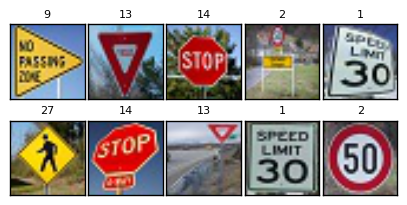

In [18]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

#labels for each image (key = file name without extension (e.g., ".jpg"))
test_image_label_dict = {
    "0": 27, #Pedestrians
    "1": 13, #Yield
    "2": 13, #Yield
    "3": 9,  #No passing
    "4": 2,  #Speed limit (50km/h)
    "5": 2,  #Speed limit (50km/h)
    "6": 14, #Stop
    "7": 14, #Stop
    "8": 1,  #Speed limit (30km/h)
    "9": 1,  #Speed limit (30km/h)
}

#lists to house the test examples from the internet
X_test_images = [] 
y_test_images = [] 

#load test image file list
test_image_file_list = glob.glob("test_images/*.jpg")
#enumerate test image list and add to X_test_images and assign labels to y_test_images
for test_image_file in test_image_file_list:
    #open current test image and append it to the X_test_images list
    X_test_images.append(mpimg.imread(test_image_file))
    #extract the file name from the relative path
    test_image_file_name = os.path.basename(test_image_file)
    #lookup the label for the current test image (based on file name without extension) and append it to y_test_images
    y_test_images.append(test_image_label_dict.get(test_image_file_name[0]))

#convert to arrays
X_test_images = np.array(X_test_images)
y_test_images = np.array(y_test_images)

print("Test images shape:", X_test_images.shape)
print("Test labels shape:", y_test_images.shape)
     
#return a list of lists contianing subplot objects handles (should return 2 rows, each row containing 5 subplot object handles)
fig, subplot_handle_list = plt.subplots(2, 5, figsize=(5, 2.2), subplot_kw={'xticks': [], 'yticks': []}, \
                                        sharex=True, sharey=True)
#adjust spacing
fig.subplots_adjust(hspace=0.3, wspace=0.05)
#flatten the subplot_handle_list and zip it with the images and labels so they can be extracted together and shown
for cur_subplot_handle, test_image, label in zip(subplot_handle_list.flat, X_test_images, y_test_images):
    cur_subplot_handle.imshow(test_image)
    cur_subplot_handle.set_title(label, fontsize=8)
#show the plot
plt.show()

#normalize test images
#convert to float
X_test_images = X_test_images.astype(np.float)
#normalize
X_test_images /= 255.0

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I tried to choose a variety of images, where the sign took up the full frame, where it was farther afield, and where it was viewed from an angle. I anticipated that the ones at an angle and farther afield would be most difficult, so I tried to compensate for that in my synthetic data set by scaling the image larger and smaller (based on a bounded uniform distribution) and also shear the image at different angles (again based on a bounded random uniform distribution). The only two signs that my model predicted correctly were the close up “Yield” and “Stop” signs (cell 2 and 3 on the top row above). I was surprised that the full frame “Speed Limit 50” sign was not correctly predicted, but have yet to investigate what the root cause is. I thought that shearing in the synthetic data would help the model better predict angled signs like the “Stop” sign on the bottom row above and the “Speed Limit 30” sign in the top row above. I also thought that translation and scaling in the synthetic data would help with the signs that were farther afield like the “Yield” sign in the bottom row above and the “Speed Limit 50” in the top row above. More for me to investigate there. 

In [19]:
from numpy import newaxis

top_3_confidence_scores_and_predicted_classes = None

#load the saved tensorflow model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_image_softmax = tf.nn.softmax(logits)
    prediction_probability_distribution = sess.run(test_image_softmax, feed_dict={x_batch: X_test_images,\
                                                                                  keep_prob: 1.0})
    top_3_confidence_scores_and_predicted_classes = sess.run(tf.nn.top_k(prediction_probability_distribution, k=3))
    top_3_confidence_scores_and_predicted_classes = sess.run(tf.nn.top_k(prediction_probability_distribution, k=3))
    test_accuracy = evaluate(X_test_images, y_test_images)
    print("Total Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    print(top_3_confidence_scores_and_predicted_classes)
    print()
    print("Evaluate test images one by one below:")
    #loop through the images and determine accuracy, class it was most confident in, and the actual class
    for i in range(len(X_test_images)):
        image = (X_test_images[i])[newaxis, :, :, :]
        label = [(y_test_images[i])]
        test_accuracy = evaluate(image, label)
        most_confident_class = top_3_confidence_scores_and_predicted_classes[1][i][0] 
        actual_class = y_test_images[i]
        print("Accuracy is {} - Most confident in class {} - Actual class was: {}".format(test_accuracy, most_confident_class, \
                                                                                      actual_class))

Total Test Accuracy = 0.200

TopKV2(values=array([[  9.94985342e-01,   4.95206099e-03,   3.65538544e-05],
       [  1.00000000e+00,   1.91828632e-22,   3.15336773e-24],
       [  1.00000000e+00,   1.93072953e-30,   1.60051420e-31],
       [  1.00000000e+00,   4.49972067e-18,   2.25618041e-18],
       [  9.99996424e-01,   2.81285452e-06,   4.29244807e-07],
       [  9.35368598e-01,   3.60978656e-02,   1.26411570e-02],
       [  1.00000000e+00,   4.24072572e-19,   4.03302732e-20],
       [  9.78946805e-01,   8.98246281e-03,   8.12147185e-03],
       [  9.92345035e-01,   7.65064359e-03,   2.51832148e-06],
       [  9.99841213e-01,   1.58760435e-04,   3.20572296e-22]], dtype=float32), indices=array([[12, 14,  0],
       [13, 12, 15],
       [14, 17, 12],
       [12, 14, 17],
       [17, 11, 30],
       [14, 12,  1],
       [12,  1, 14],
       [33, 35, 36],
       [17, 20, 36],
       [ 1,  2,  5]], dtype=int32))

Evaluate test images one by one below:
Accuracy is 0.0 - Most confident in c

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** I fed the model 10 images I retrieved from the internet and it performed worse (20% accuracy - results shown above) than on the test set (96% accuracy) or the validation set (99.4%+ accuracy). My logic for the misses is that my model is not adept at signs that are farther afield and at an extreme angle. Brightness of the images may also be key here. I used the rotation, shearing, translation, and scaling values from the LeCun paper but maybe I didn't create enough data or there wasn't enough variability in relation to angles, rotation, etc. I will continue to investigate root cause as to improve the model further.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** For the first image "No Passing" (shown above), the model was most certain that this image was a "Priority Road" sign, then next certain that it was a "Stop" sign, then third a "Speed Limit 20" sign. For the next two images (which it correctly predicted), the model was extremely confident in its choice (vs. the other options). The pattern I'm seeing is that the model is confident in its predictions (whether right or wrong). The probabilities don't look close; the class it's most confident of seems to be an outlier (the visible winner).

In two instances the correct class was in the top 3 predictions (though not the one the model was most confident in). The first instance is the "Stop" sign on the bottom row (above), the model predicted it was a "Priority Road", but thirdly that it was a "Stop" sign. The second instance is the "Speed Limit 50" sign on the bottom row (above), the model predicted that it was a "Speed Limit 30" sign, but secondly that it was a "Speed Limit 50" sign. 

Possible root cause: When I pulled these images down, I resized them and couldn't maintain the aspect ratio to get them to 32x32, so maybe that has something to do with it. Also, these images are all bright and the training set is full of dull, blurry, dark, and somewhat washed out types of images, so maybe I need to augment more (bright, clear, etc.) to get the model to generalize better. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.